# 안동 기온 데이터 분석(1973/01/01 ~ 2019/12/31)

## 공공 데이터 얻기

1. 기상자료개방포털(https://data.kma.go.kr/) 접속
1. 기후통계분석 >> 통계분석 >> 기온분석 메뉴로 들어가서
1. 기간 설정 : 1973년 1월 1일부터 2019년 12월 31일까지
1. 지역 : 경상북도 안동
1. 검색 버튼 클릭
1. 그래프가 나타나면 [csv다운로드] 버튼 클릭 
1. 'andongTemp.csv'라는 이름으로 저장
1. 다운로드한 csv파일을 엑셀 프로그램으로 열고 1~7행을 모두 삭제한 후 'utf-8' 형식으로 다시 저장(andongTemp.csv), 
* csv : comma-separated values, 몇 가지 필드를 쉼표(,)로 구분한 텍스트 데이터 및 텍스트 파일


## CSV 파일 열기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [19]:
import numpy as np
import pandas as pd
tempData = pd.read_csv('/gdrive/My Drive/빅데이터교육/andongTemp.csv', encoding='utf-8')
tempData

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,136,-0.5,-4.6,4.0
1,1973-01-02,136,-2.3,-8.2,3.0
2,1973-01-03,136,-4.2,-8.7,0.1
3,1973-01-04,136,-1.8,-7.0,4.1
4,1973-01-05,136,-1.3,-5.5,5.5
...,...,...,...,...,...
15455,2019-12-27,136,-0.9,-3.9,4.4
15456,2019-12-28,136,-1.9,-8.7,6.1
15457,2019-12-29,136,-0.8,-6.7,3.9
15458,2019-12-30,136,2.9,-0.3,7.6


In [20]:
# '지점' 열(axis=1) 제거
tempData.drop('지점', axis=1, inplace=True)
tempData

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,-0.5,-4.6,4.0
1,1973-01-02,-2.3,-8.2,3.0
2,1973-01-03,-4.2,-8.7,0.1
3,1973-01-04,-1.8,-7.0,4.1
4,1973-01-05,-1.3,-5.5,5.5
...,...,...,...,...
15455,2019-12-27,-0.9,-3.9,4.4
15456,2019-12-28,-1.9,-8.7,6.1
15457,2019-12-29,-0.8,-6.7,3.9
15458,2019-12-30,2.9,-0.3,7.6


In [21]:
# 날짜를 인덱스 열로 변경
date = tempData['날짜']
tempData.drop('날짜', axis=1, inplace=True)
tempData.index=date
tempData

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1973-01-01,-0.5,-4.6,4.0
1973-01-02,-2.3,-8.2,3.0
1973-01-03,-4.2,-8.7,0.1
1973-01-04,-1.8,-7.0,4.1
1973-01-05,-1.3,-5.5,5.5
...,...,...,...
2019-12-27,-0.9,-3.9,4.4
2019-12-28,-1.9,-8.7,6.1
2019-12-29,-0.8,-6.7,3.9


## 안동에서 가장 더웠던 날과 가장 추웠던 날은 언제일까?

In [22]:
# 가장 더운 온도와 날짜를 넣을 변수 생성
maxTemp = -999      # 정수형 변수
maxDate = ''        # 문자열형 변수
date = tempData.index

# 행의 수만큼 반복
for x in range(len(tempData)) :             # 0 이상 15,460 미만
    highest = float(tempData.iloc[x, 2])    # 인덱스 제외, 0~2열 중 최고기온은 2열
    if maxTemp < highest:
        maxTemp = highest
        maxDate = date[x]

print('기상 관측 이래 안동에서 가장 더웠던 날 :', maxDate)
print('안동의 최고 온도 :', maxTemp, '도')


기상 관측 이래 안동에서 가장 더웠던 날 : 2018-07-27
안동의 최고 온도 : 38.9 도


In [23]:
# 가장 추운 온도와 날짜를 넣을 변수 생성
minTemp = 999      # 정수형 변수
maxDate = ''       # 문자열형 변수
date = tempData.index

# 행의 수만큼 반복
for x in range(len(tempData)) :            # 0 이상 15,460 미만
    lowest = float(tempData.iloc[x, 1])    # 인덱스 제외, 0~2열 중 최저기온은 1열
    if minTemp > lowest:
        minTemp = lowest
        minDate = date[x]

print('기상 관측 이래 안동에서 가장 추웠던 날 :', minDate)
print('안동의 최저 온도 :', minTemp, '도')


기상 관측 이래 안동에서 가장 추웠던 날 : 2013-01-04
안동의 최저 온도 : -20.4 도


## 2000년 이후 매년 8월 1일의 최고 기온과 최저 기온의 변화를 라인 그래프로 그려보기

In [ ]:
import matplotlib.pyplot as plt

highestTemp = []
lowestTemp = []
for x in range(len(tempData)) :
    row = tempData.iloc[x]
    if int(row[0].split('-')[0]) >= 2000 :
        if row[0].split('-')[1] == '08' and row[0].split('-')[2] == '01':
            highestTemp.append(float(row[-1]))
            lowestTemp.append(float(row[-2]))

plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show()

### x축 값을 연도로 표시

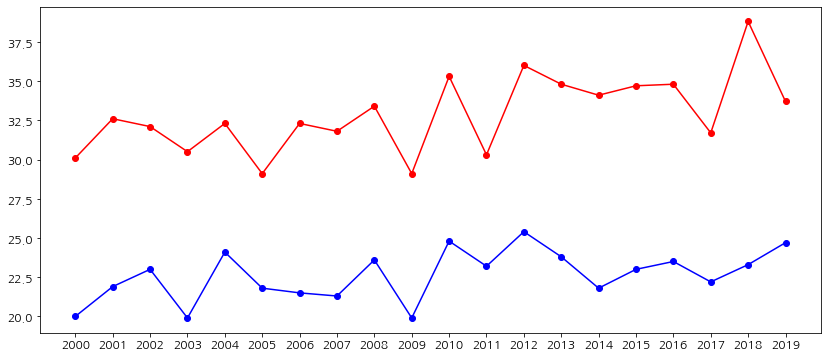

In [25]:
import matplotlib.pyplot as plt

highestTemp = []
lowestTemp = []
year = []
date = tempData.index
for x in range(len(tempData)) :
    row = tempData.iloc[x]
    if int(date[x].split('-')[0]) >= 2000 :
        if date[x].split('-')[1] == '08' and date[x].split('-')[2] == '01':
            year.append(int(date[x].split('-')[0]))
            highestTemp.append(float(row[-1]))
            lowestTemp.append(float(row[-2]))

# figure size - 14:6
plt.rcParams["figure.figsize"] = (14,6)
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')

plt.show()

##그래프에 제목 표시

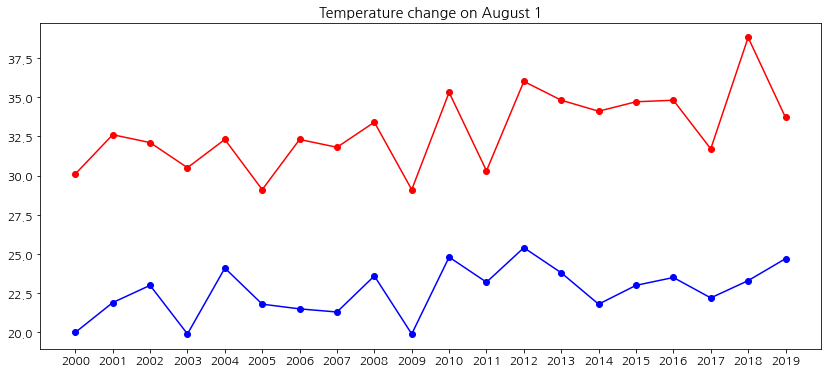

In [26]:
plt.title('Temperature change on August 1')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show()

## 그래프에 한글로 제목 표시

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_

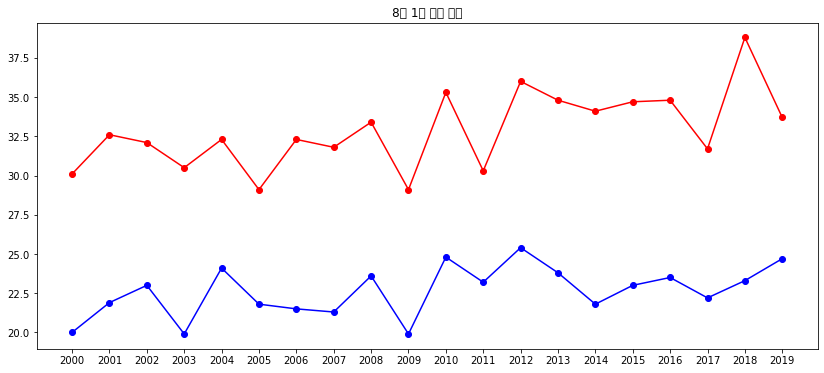

In [ ]:
plt.title('8월 1일 온도 변화')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show()

### 한글 폰트 사용하기

In [ ]:
#폰트를 설치
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
#print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetyp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
#plt.rc('font', family='NanumGothic') 
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
fm._rebuild()

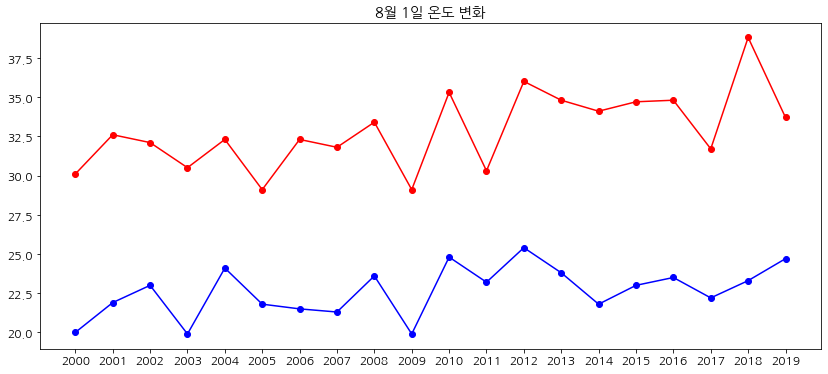

In [ ]:
plt.title('8월 1일 온도 변화')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show()

### 최고 온도와 최저 온도를 막대 그래프로 그리기 

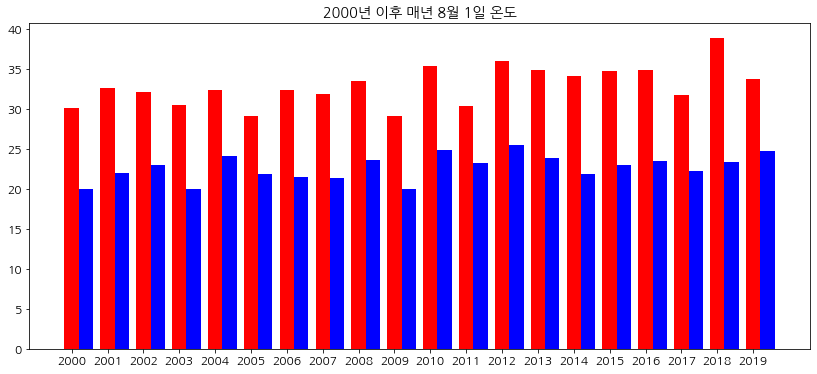

In [ ]:
xPos = np.arange(len(year))
plt.bar(xPos, highestTemp, label='최고온도', width=0.4, color='#ff0000')
plt.bar(xPos+0.4, lowestTemp, label='최저온도', width=0.4, color='#0000ff')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.title('2000년 이후 매년 8월 1일 온도')
plt.show()